Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# EKONOMIJA
## 30.03.2021. 

# Pavle Šarenac 2020/0359

#### __Zadatak 1__: Dinamički model
Za malu porodičnu piceriju funkcije ponude i potražnje su linearne funkcije cene: $Q_d(P) = A - BP$ i $Q_s(P) = -C + DP$, gde je $A = 22$ pice po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 7$ pica po danu po evru.

a) Formirati Python skriptu koja prema algoritmu sa slajdova, za definisane funkcije ponude i potražnje pronalazi stacionarno stanje $P_{eq}$. Na istom grafiku nacrtati funkcije $Q_d(P)$ i  $Q_s(P)$. Označiti ose grafika. 

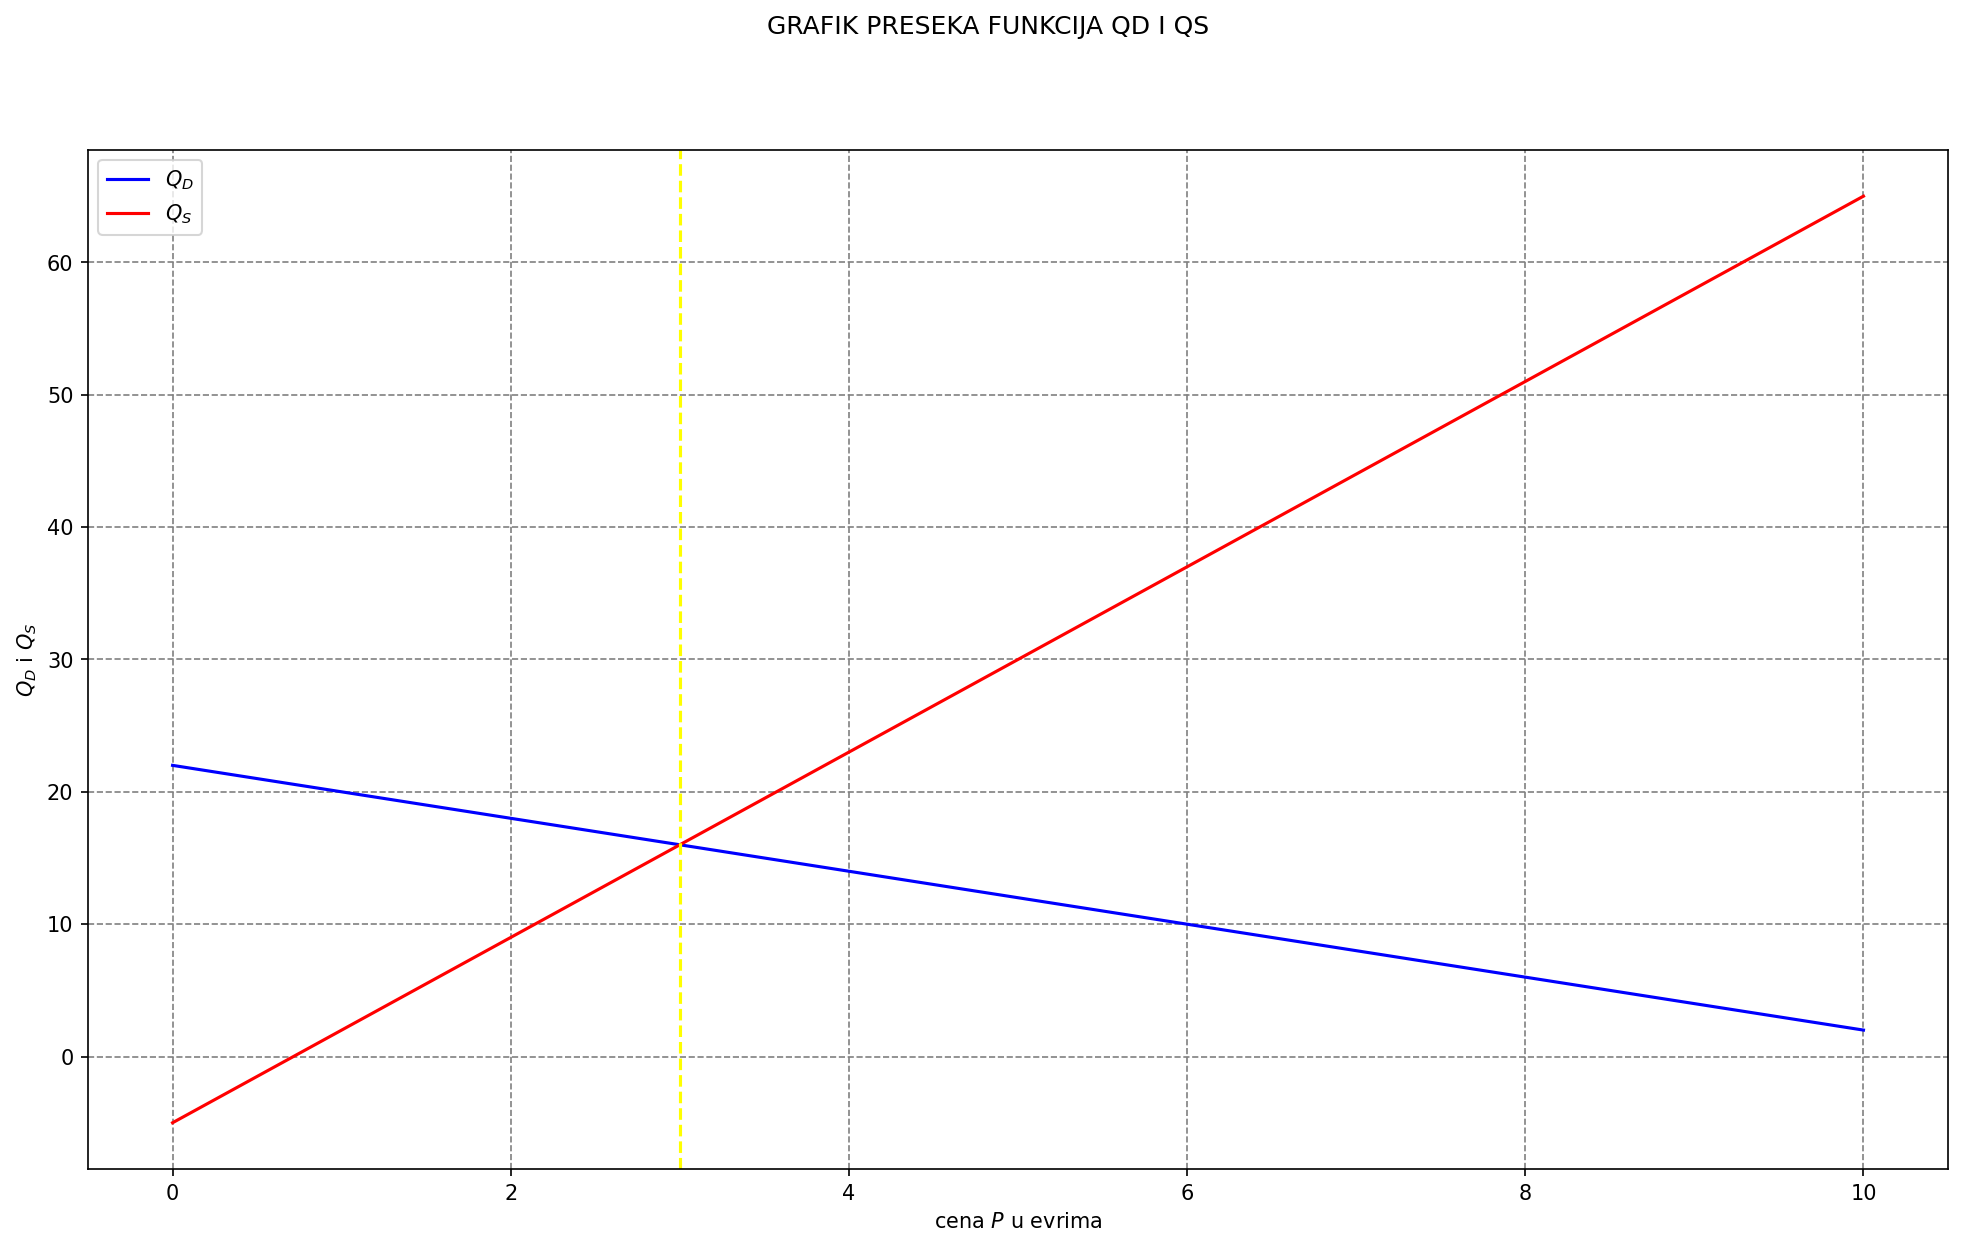

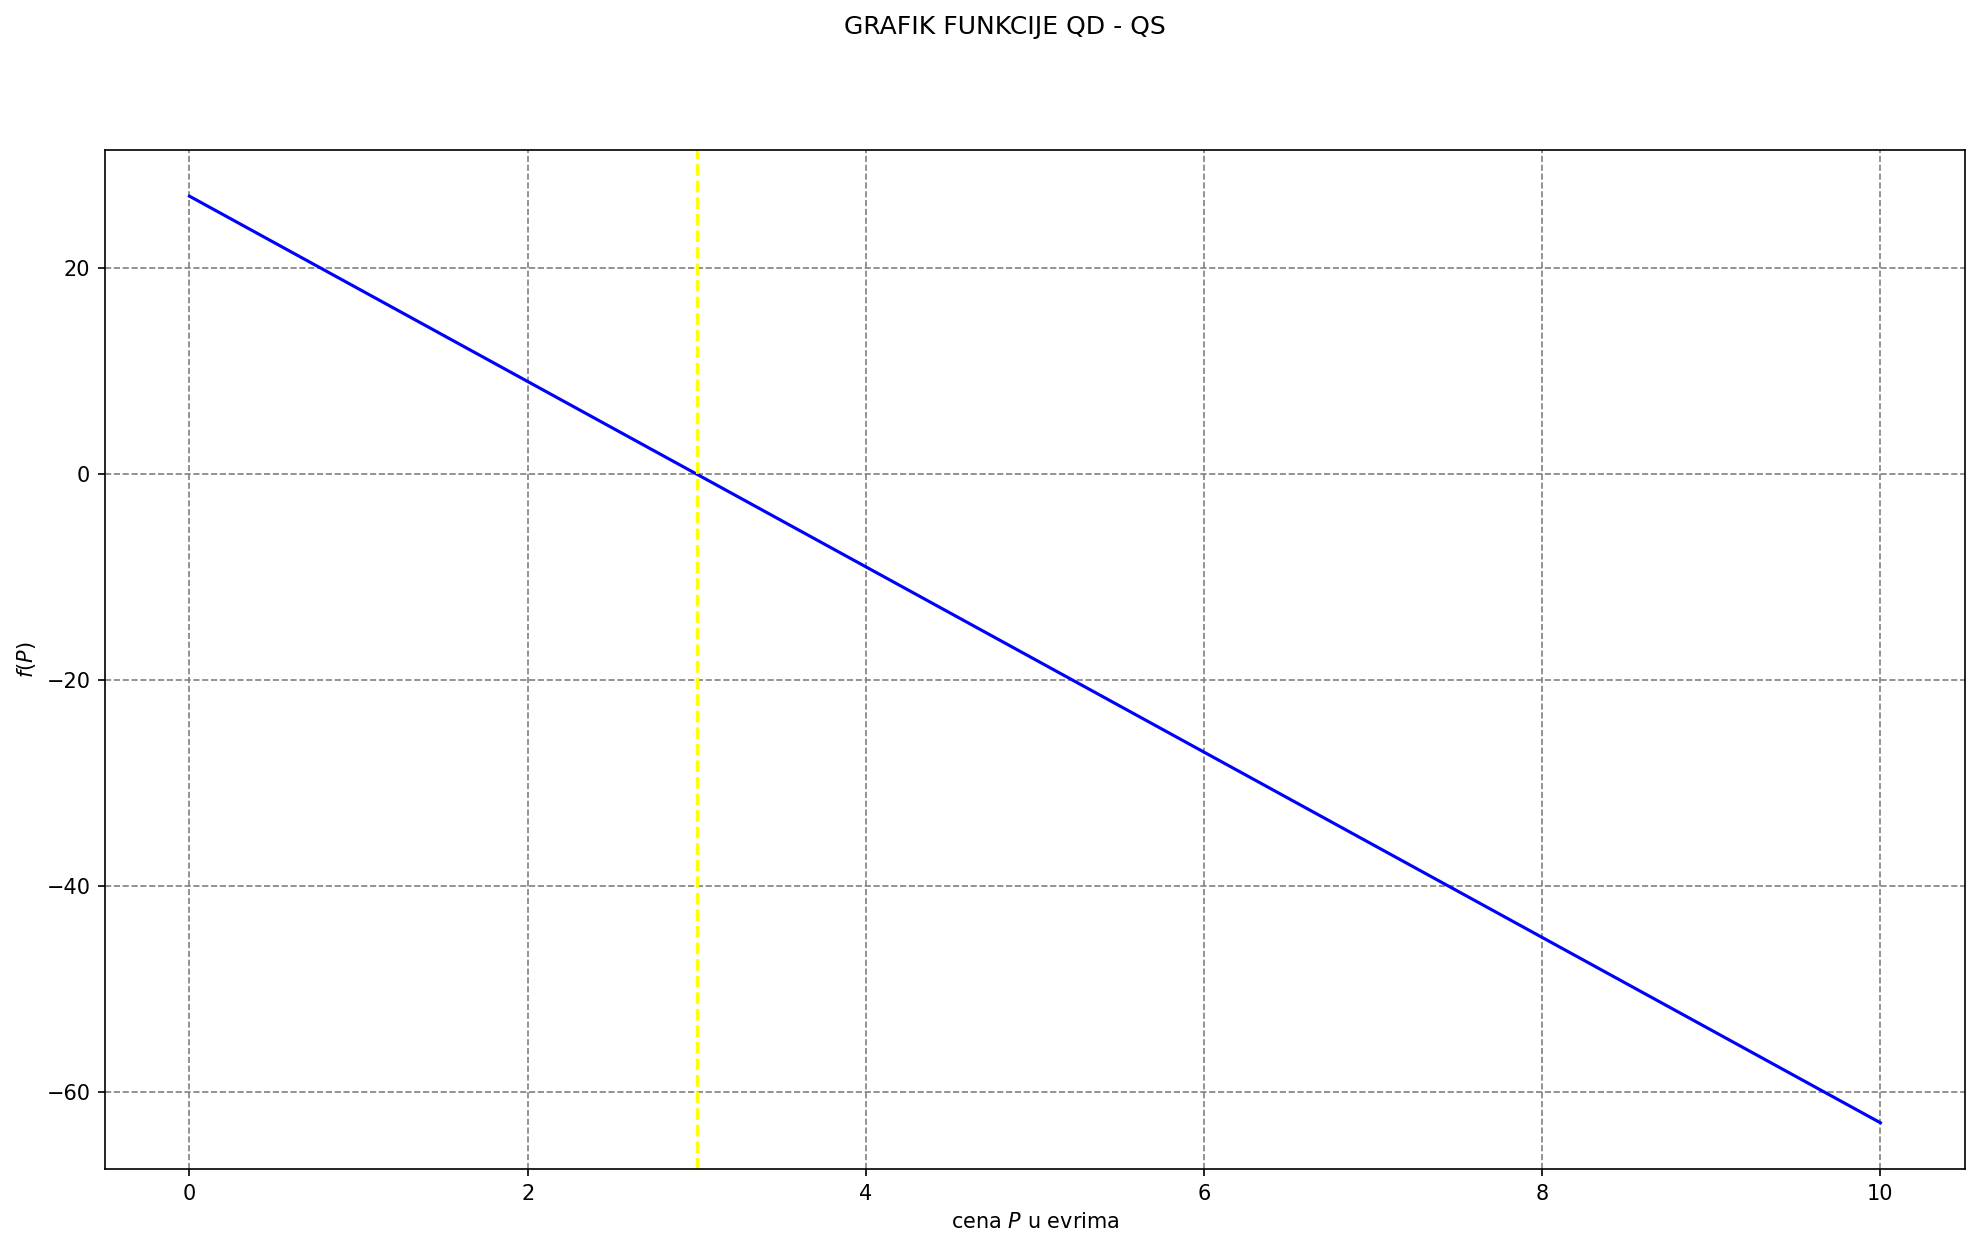

Cena za koju se uspostavlja stacionarno stanje je: 3.0000000000000004


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import integrate

A, B, C, D = 22, 2, 5, 7
QD = lambda P, A, B: A - B*P   # funkcija za potraznju (demand) --> array
QS = lambda P, C, D: -C + D*P  # funkcija za ponudu (supply) --> array

funkcija = lambda P, A, B, C, D: QD(P, A, B) - QS(P, C, D)  # --> array
# nule ove funkcije trazimo --> ponuda jednaka potraznji(stacionarna stanja)

P = np.linspace(0, 10, 2000)  # opseg u kojem zelim da trazim nule funkcije --> trazim za cenu u opsegu od 0 do 10 evra
# ovde je problem prost jer imamo samo jedan presek funkcija ponude(QS) i potraznje(QD)
# ali ako bi funkcija imala neke brze promene bolje je da kod np.linspace() izdelimo na sto vise ekvidistantnih tacaka da bismo
# bili sigurni da nismo ispustili nijednu nulu funkcije!!!

znak = np.sign(funkcija(P, A, B, C, D)) 
# znak je array u koji smestam znake funkcije u svakoj od tacaka u opsegu P(0, 10, 2000)
# dakle array znak ce imati isto elemenata koliko i array P
# np.sign() vraca niz od elemenata koji se formiraju po sledecem pravilu:
# vraca 1 za pozitivan argument, 0 za nulu, -1 za negativan argument

razlike = np.diff(znak) # array
# np.diff() pronalazi razliku izmedju svaka dva susedna elementa
# np.diff() daje novi niz [znak[1] - znak[0], znak[2] - znak[1], znak[3] - znak[2]...]
# ovaj novi niz ce imati jedan clan manje u odnosu na pocetni jer prvi element nema prethodnika
# np.diff() vraca nulu sve dok je sledeci znak isti kao prosli -> npr 1-1=0, -1-(-1)=0
# kada np.diff() vrati nesto sto nije nula znamo da se znak promenio -> npr. 1-(-1)=2, 1-0=1, -1-1=-2

nule = np.where(razlike != 0)
# np.where() vraca array sa indeksima elemenata niza "razlike" koji su razliciti od nule
# to su ujedno i indeksi elemenata P koji su u okolini tacke za koju funkcija prolazi kroz nulu

# kad su elementi niza "razlike" razliciti od nule to znaci da je funkcija izmedju ta dva znaka koja cine tu razliku prosla nulu
# ovde je npr nule = [599] --> razlike[nule[0]] != 0
# dakle element niza "razlike" sa indeksom 599 je razlicit od nule, 
# tj. razlike[599] = znak[600] - znak[599] != 0
# odavde zakljucujemo da ce funkcija proci kroz nulu izmedju elementa niza P sa indeksom 599 i elementa niza P sa indeksom 600
# P[599] = 2.996, P[600] = 3.015

# znaci sustina je bila da nadjemo tacku u cijoj okolini funkcija prolazi kroz nulu --> P[599] = P[nule[0]]
# na osnovu takve tacke P metoda optimize.newton moze da nadje tacku u kojoj funkcija prolazi kroz nulu

Peq = [optimize.newton(funkcija, P[nule[i]], args=(A, B, C, D)) for i in range(len(nule))]
# Peq, tj P equilibrium je vrednost cene za koju se postize stacionarno stanje (supply = demand)
# opitmize.newton ovde odredjuje nule funkcije "funkcija" u okolini tacke P[nule[i]]
# dakle dobijamo niz Peq sto je niz cena za koju se uspostavlja stacionarno stanje (QD = QS, tj. demand = supply)
# ako dobijemo Peq kao prazan niz, znaci da nismo nasli na datom opsegu P(0, 10, 2000) nijednu nulu
# onda mozemo da povecamo opseg P i da probamo opet --> npr P(0, 20, 2000) itd.

# grafik preseka funkcija QD i QS
plt.figure(figsize=(16, 9), dpi=150)
plt.suptitle("GRAFIK PRESEKA FUNKCIJA QD I QS")
plt.plot(P, QD(P, A, B), "b-", label="$Q_{D}$") # QD je zapravo array sa istim brojem elemenata kao i P
plt.plot(P, QS(P, C, D), "r-", label="$Q_{S}$") # QS je zapravo array sa istim brojem elemenata kao i P
plt.axvline(Peq[0], linestyle="--", color="yellow")
plt.xlabel("cena $P$ u evrima")
plt.ylabel("$Q_{D}$ i $Q_{S}$")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.legend()
plt.show()

print()

# grafik funkcije QD - QS <-- mi zelimo da algebarski nadjemo nule ove funkcije jer su to stacionarna stanja (supply = demand)
plt.figure(figsize=(16, 9), dpi=150)
plt.suptitle("GRAFIK FUNKCIJE QD - QS")
plt.plot(P, funkcija(P, A, B, C, D), "b-")
plt.xlabel("cena $P$ u evrima")
plt.ylabel("$f(P)$")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.axvline(Peq[0], linestyle="--", color="yellow")
plt.show()

for i in range(len(Peq)):
    print("Cena za koju se uspostavlja stacionarno stanje je: {}".format(Peq[0][i]))

b) Formirati Python definiciju (<font color='blue'>dinamicki_model</font>) koja predstavlja odgovarajuću diferencijalnu jednačinu kojom je opisana dinamika cene. Dinamika cene opisana je trenutnom razlikom između funkcije ponude i potražnje kao:

<br>
\begin{equation}
    \frac{dP(t)}{dt} = \gamma(Q_d(P) - Q_s(P)) = -\gamma(B + D)P(t) + \gamma(A + C)
\end{equation}
<br>

gde je faktor korelacije $\gamma = 0.1$ u odgovarajućim jedinicama. 
Koeficijenti $A$, $B$, $C$, $D$ i $\gamma$ treba da budu pozivni parametri definicije koja predstavlja diferencijalnu jednačinu.

In [15]:
def dinamicki_model(pocetniUslov, vreme, A, B, C, D, gamma): # dinamicki linearni model
    return -gamma*(B + D)*pocetniUslov + gamma*(A + C)

c) Formirati Python skriptu koja rešava diferencijalnu jednačinu i iscrtava njena rešenja. Na istom grafiku prikazati dinamiku cene za tri moguća slučaja: početna cena $P(0)$ jednaka je ravnotežnoj ceni ($P(0) = P_{eq}$), početna cena je veća od ravnotežne ($P(0) = 2P_{eq}$) i početna cena je manja od ravnotežne cene ($P(0) = 0.5P_{eq}$). Za definisane parametre i početne uslove, rešavati diferencijalnu jednačinu na vremenskom domenu od $0$ do $10$ dana u $1000$ ekvidistantnih tačaka. Na istom grafiku, različitim bojama (plavom, crvenom i zelenom), nacrtati profile $P(t)$ za sva tri slučaja početnih uslova. Označiti ose grafika i ubaciti legendu.

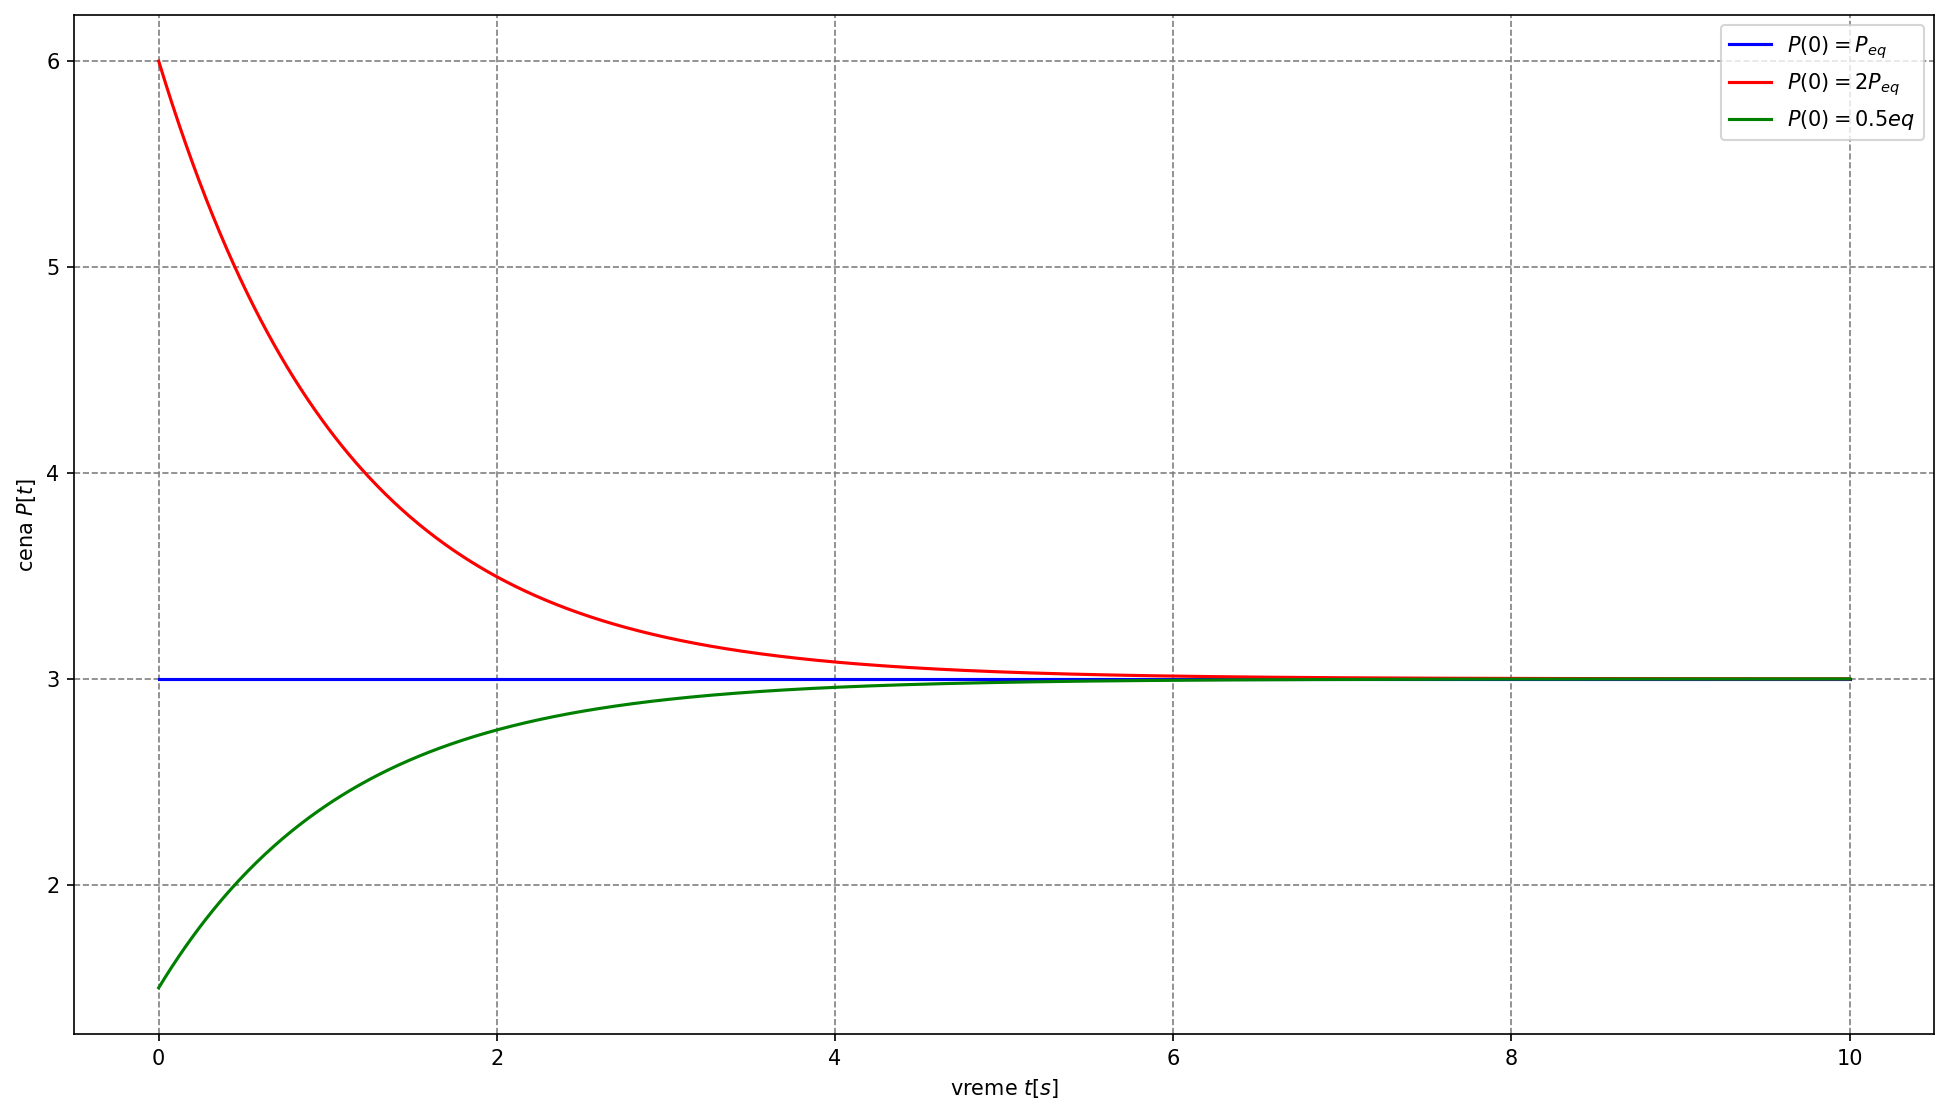

In [16]:
vreme = np.linspace(0, 10, 1000)
pocetniUslov = [Peq[0], 2*Peq[0], 0.5*Peq[0]]
gamma = 0.1

sol_1 = integrate.odeint(dinamicki_model, pocetniUslov[0], vreme, args=(A, B, C, D, gamma))
sol_2 = integrate.odeint(dinamicki_model, pocetniUslov[1], vreme, args=(A, B, C, D, gamma))
sol_3 = integrate.odeint(dinamicki_model, pocetniUslov[2], vreme, args=(A, B, C, D, gamma))

plt.figure(figsize=(16, 9), dpi=150)
plt.plot(vreme, sol_1, "b-", label="$P(0)=P_{eq}$")
plt.plot(vreme, sol_2, "r-", label="$P(0)=2P_{eq}$")
plt.plot(vreme, sol_3, "g-", label="$P(0)=0.5eq}$")
plt.xlabel("vreme $t[s]$")
plt.ylabel("cena $P[t]$")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.legend()
plt.show()

d) Da li sistem ima stabilnu dinamiku? Šta se dešava sa cenom posle dovoljno dugog vremena? Da li se dostiže predviđeno stacionarno stanje? 

funkcija ponude: QS(P) = -C + DP (što je veća cena P, prodavac hoće više artikala da proda pa je veća ponuda QS) <br>
funkcija potražnje: QD(P) = A - BP (što je veća cena P, to manje kupaca želi da kupi pa je manja potražnja QD)

Znamo da je analitičko rešenje ove diferencijalne jednačine za slučaj početnog uslova P(0) = P0 ima formu: <br>
P(t) = (P0 - Peq)exp(-gamma(B + D)vreme) + Peq

Pošto je gamma > 0, stabilnost cene je obezbeđena samo u slučaju B + D > 0, jer će tada cena eksponencijalno opadati kroz vreme. U suprotnom, cena bi eksponencijalno rasla u vremenu. 

Ovaj uslov se svodi na D > -B, odnosno da nagib funkcije ponude mora biti veći od nagiba funkcije potražnje!
Kada je ispunjen uslov D > -B, dinamika cene je stabilna i sistem će sigurno dostići stacionarnu cenu Peq posle dovoljno dugo vremena, samo je pitanje koliko će vremena biti za to potrebno u zavisnosti od početnih uslova.

Pošto je u našem slučaju D = 7, B = 2, onda je D > -B, pa naš sistem ima stabilnu dinamiku i cena dostiže predviđeno stacionarno stanje Peq u kom se smiruje.

#### __Zadatak 2__: Model sa očekivanjima cena

a) Na primeru porodične picerije sa slajdova primeniti kompleksniji model koji uključuje modelovanje očekivanja cene od strane potraživača. U takvom modelu funkcija potražnje $Q_d$ zavisi i od promene cene, kao i od brzine njene promene:

<br>
\begin{equation}
    Q_d = A - BP + M\frac{dP}{dt} + N\frac{d^2P}{dt^2},\\
    Q_s = -C + DP.
\end{equation}
<br>

Diferencijalna jednačina koja opisuje promenu cene proizvoda u ovakvom modelu i koju treba rešavati dobija se izjednačavanjem $Q_d = Q_s$ i ima formu:

<br>
\begin{equation}
    \frac{d^2P}{dt} + \frac{M}{N}\frac{dP}{dt} - \frac{B+D}{N}P = -\frac{A+C}{N}.
\end{equation}
<br>


Formirati Python definiciju (<font color='blue'>ocekivanja_cene</font>) koja predstavlja odgovarajuću diferencijalnu jednačinu kojom je opisana dinamika cene. Koeficijenti $A$, $B$, $C$, $D$, $M$ i $N$ treba da budu pozivni parametri definicije koja predstavlja diferencijalnu jednačinu.

In [17]:
def ocekivanja_cene(pocetniUslov, vreme, A, B, C, D, M, N):
    y1, y2 = pocetniUslov # y1 = P, y2 = dP/dt, za t = 0
    # dy1/dt = y2
    # dy2/dt = d^2P/dt^2 = -M/N*dP/dt + (B + D)*P/N - (A + C)/N = -M/N*y2 + (B + D)*y1/N - (A + C)/N
    return [y2, -(M/N)*y2 + (B + D)*(y1/N) - (A + C)/N]

b) Ispitati i diskutovati dinamiku sistema za slučaj sledećih parametara:
<ol>
<li>$A = 42$ pice po danu, $B = 4$ pice po danu po evru, $C = 6$ pica po danu, $D = 8$ pica po danu po evru, $M = –4$ pice po evru, $N = 1$ (u odgovarajućim jedinicama), $P(0) = 6$ evra, $dP/dt(0) = 4$ evra po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li> 
<br>    
    
<li>$A = 40$ pica po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 3$ pice po danu po evru, $M = –2$ pice po evru, $N = –1$ (u odgovarajućim jedinicama), $P(0) = 12$ evra, $dP/dt(0) = 1$ evro po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li>
<br> 

<li>$A = 40$ pica po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 3$ pice po danu po evru, $M = 0.5$ pice po evru, $N = –1$ (u odgovarajućim jedinicama), $P(0) = 12$ evra, $dP/dt(0) = 1$ evro po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li>
</ol>
Za svaki od tri slučaja na jednom subplot-u nacrtati i vremenski ($P$ u funkciji od $t$) i fazni dijagram ($dP/dt$ u funkciji od $P$) dinamike cene.  

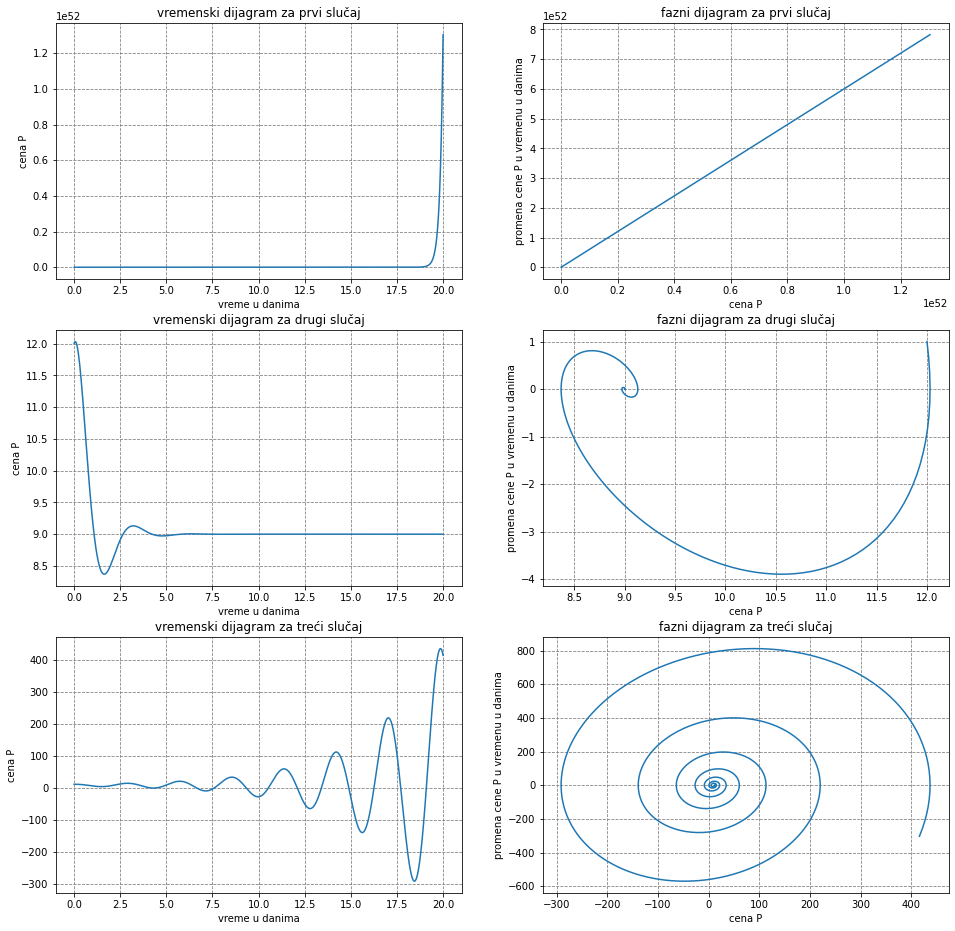

In [18]:
vreme = np.linspace(0, 20, 1000)
plt.figure(figsize=(16, 16))

A1, B1, C1, D1, M1, N1 = 42, 4, 6, 8, -4, 1
A2, B2, C2, D2, M2, N2 = 40, 2, 5, 3, -2, -1
A3, B3, C3, D3, M3, N3 = 40, 2, 5, 3, 0.5, -1

pocetniUslov1 = [6, 4]
pocetniUslov2 = [12, 1]
pocetniUslov3 = [12, 1]

sol_1 = integrate.odeint(ocekivanja_cene, pocetniUslov1, vreme, args=(A1, B1, C1, D1, M1, N1))
sol_2 = integrate.odeint(ocekivanja_cene, pocetniUslov2, vreme, args=(A2, B2, C2, D2, M2, N2))
sol_3 = integrate.odeint(ocekivanja_cene, pocetniUslov3, vreme, args=(A3, B3, C3, D3, M3, N3))

plt.subplot(3, 2, 1)
plt.title("vremenski dijagram za prvi slučaj")
plt.plot(vreme, sol_1[:, 0])
plt.xlabel("vreme u danima")
plt.ylabel("cena P")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.subplot(3, 2, 2)
plt.title("fazni dijagram za prvi slučaj")
plt.plot(sol_1[:, 0], sol_1[:, 1])
plt.xlabel("cena P")
plt.ylabel("promena cene P u vremenu u danima")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.subplot(3, 2, 3)
plt.title("vremenski dijagram za drugi slučaj")
plt.plot(vreme, sol_2[:, 0])
plt.xlabel("vreme u danima")
plt.ylabel("cena P")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.subplot(3, 2, 4)
plt.title("fazni dijagram za drugi slučaj")
plt.plot(sol_2[:, 0], sol_2[:, 1])
plt.xlabel("cena P")
plt.ylabel("promena cene P u vremenu u danima")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.subplot(3, 2, 5)
plt.title("vremenski dijagram za treći slučaj")
plt.plot(vreme, sol_3[:, 0])
plt.xlabel("vreme u danima")
plt.ylabel("cena P")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.subplot(3, 2, 6)
plt.title("fazni dijagram za treći slučaj")
plt.plot(sol_3[:, 0], sol_3[:, 1])
plt.xlabel("cena P")
plt.ylabel("promena cene P u vremenu u danima")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.show()

c) Na osnovu analize stabilnosti sa slajdova, komentarisati očekivane rezultate dinamike sa dobijenim graficima. 
U kom slučaju je dinamika stabilna, u kom nestabilna i zašto? 
Komentarisati fazne dijagrame. Kojoj vrsti oscilacija odgovara ovakav model? 
Šta bi, prema analogiji sa fizikom, bio najbolji mogući slučaj za dinamiku cene? Predložiti neke vrednosti za parametre $B$, $D$, $M$ i $N$ tako da dinamike cene bude optimalna. Nacrtati grafik takve dinamike cene.

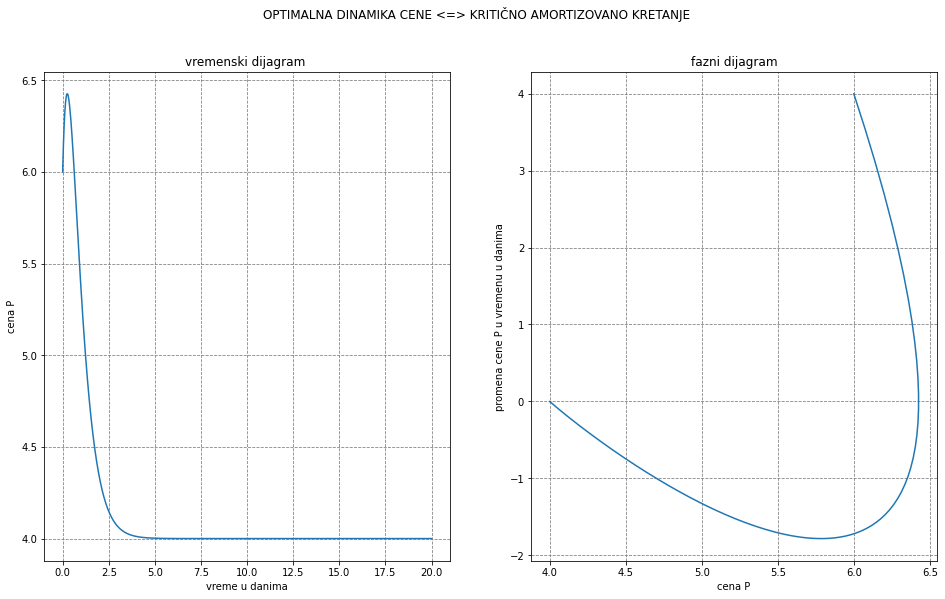

In [19]:
A, B, C, D, M, N = 42, 8, 6, 4, -12, -3
pocetniUslov = [6, 4]

plt.figure(figsize=(16, 9))
plt.suptitle("OPTIMALNA DINAMIKA CENE <=> KRITIČNO AMORTIZOVANO KRETANJE")
sol = integrate.odeint(ocekivanja_cene, pocetniUslov, vreme, args=(A, B, C, D, M, N))

plt.subplot(1, 2, 1)
plt.title("vremenski dijagram ")
plt.plot(vreme, sol[:, 0])
plt.xlabel("vreme u danima")
plt.ylabel("cena P")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.subplot(1, 2, 2)
plt.title("fazni dijagram")
plt.plot(sol[:, 0], sol[:, 1])
plt.xlabel("cena P")
plt.ylabel("promena cene P u vremenu u danima")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.show()

Složeniji model tržišta podrazumeva da prodavac (ponuđač) i kupac (potraživač) koriguju svoje funkcije ne samo prema trenutnoj ceni već i prema određenim trendovima, odnosno očekivanjima.

Model sa očekivanjem čine jednačine: <br>
QD = A - BP + M(dP/dt) + N(d^2P/dt^2), (A, B > 0) <br>
QS = -C + DP + U(dP/dt) + W(d^2P/dt^2), (C, D > 0) <br>

Parametri M, N, U, W modeluju očekivanje cene: <br>
--> Ako je M > 0, rastuća cena utiče da i QD (potražnja) poraste jer više kupaca želi da kupi robu što pre dok cena nije previše porasla. <br>
--> Ako je M < 0, kupci očekuju da će cena pasti, pa je QD (potražnja) manja dok se cena ne spusti. <br>
--> Parametar N modeluje porast ili smanjenje potražnje u zavisnosti od brzine promene cene. <br>
--> Parametri U i W modeluju očekivanja prodavca po analogiji sa očekivanjima kupca.

Ako zanemarimo očekivanja prodavca (U, W = 0) i izjednačimo QD i QS, dolazimo do linearne nehomogene diferencijalne jednačine drugog reda: <br>
𝑑^2𝑃/𝑑𝑡^2 + (𝑀/𝑁)*(dP/dt) - P*(B + D)/N = -(A + C)/N <br>
Forma jednačine je identična formi koja se dobija u modelu prigušenog oscilatornog kretanja: <br>
𝑑^2𝑃/𝑑𝑡^2 + 2alpha*(dP/dt) + omega0^2*P = -(A + C)/N <br>
alpha = M/2N <br>
omega0^2 = -(B + D)/N <br>

Moguća rešenja su: <br>
1) slabo prigušene oscilacije, za alpha < omega0: <br>
P(t) = Kexp(-alpha*t)sin(omega*t + fi) <br>
2) kritično prigušene oscilacije, za alpha = omega0: <br>
P(t) = (K1 + K2t)exp(-alphat) <br>
3) jako prigušene oscilacije, za alpha > omega0: <br>
P(t) = K3exp(-lamda1t) + K4exp(-lambda2t) <br>
lambda1,2 = alpha +- sqrt(alpha^2 - omega0^2)

U slučaju 1) i 2) dinamika sistema je stabilna ako je alpha > 0. Za alpha < 0, amplituda oscilacija raste iz periode u periodu i imamo nestabilnu dinamiku sistema.<br>
U slučaju 3) dinamika je stabilna ako su lambda1, lambda2 > 0. Ako je lambda1 ili lambda 2 < 0, da bi dinamika bila stabilna potrebno je da odgovarajući koeficijent (K3 ako je lambda1 < 0, K4 ako je lambda2 < 0) bude jednak nuli. U suprotnom imamo nestabilnu dinamiku sistema.

Prvi slučaj - vremenski dijagram: 
--
alpha = M/2N = -4/2 = -2 <br>
omega0^2 = -(B + D)/N = -12/1 = -12 <br>
--> omega0 (sopstvena kružna učestanost) je kompleksan broj, tako da u ovom sistemu nema oscilacija, već cena eksplodira u beskonačnost, dakle sistem ima nestabilnu dinamiku.

Drugi slučaj - vremenski dijagram:
--
alpha = M/2N = -2/-2 = 1 <br>
omega0^2 = -(B + D)/N = -5/-1 = 5 <br>
alpha < omega0 --> u pitanju su slabo prigušene oscilacije; pošto je alpha > 0, sistem ima stabilnu dinamiku i smiruje se u stacionarnom stanju.

Treći slučaj - vremenski dijagram:
--
alpha = M/2N = 0.5/-2 = -0.25 <br>
omega0^2 = -(B + D)/N = -5/-1 = 5 <br>
alpha < omega0 --> u pitanju su slabo prigušene oscilacije; pošto je alpha < 0, sistem nema stabilnu dinamiku jer amplituda oscilacija raste iz periode u periodu.

Prvi slučaj - fazni dijagram: 
--
Ovakav model ne pripada nijednoj vrsti oscilacija. Ovo je i očekivano s obzirom da se vidi na vremenskom dijagramu da uopšte nije u pitanju oscilatorno kretanje jer cena eksplodira u beskonačnost.

Drugi slučaj - fazni dijagram: 
--
Vidimo sa slike kako se grafik umotava u obliku spirale dok se ne smiri u stacionarnom stanju. Ovakav fazni dijagram odgovara slabo prigušenim oscilacijama kod kojih je alpha pozitivno.

Treći slučaj - fazni dijagram: 
--
Vidimo sa slike kako se grafik otpetljava, tojest promena cene u vremenu se povećava zajedno sa cenom, što je i logično jer na vremenskom dijagramu vidimo da amplituda oscilovanja raste iz periode u periodu jer je alpha negativno. Ovakav fazni dijagram odgovara slabo prigušenim oscilacijama kod kojih je alpha negativno.

Prema analogiji sa fizikom, najbolji mogući scenario za dinamiku cene bi bile kritično prigušene oscilacije jer se kod njih oscilator najbrže vraća u ravnotežno stanje, dakle cena će se za najkraće vreme smiriti u stacionarnom stanju što je veoma pogodno i za prodavca i za kupce. <br>

Da bismo imali kritično amortizovano kretanje mora da bude ispunjen uslov alpha = omega0: <br>
alpha = M/2N <br>
omega0^2 = -(B + D)/N <br>
Mora da važi: <br>
--> M/2N = sqrt(-(B + D)/N) <br>
Možemo da uzmemo onda npr. B = 8, D = 4, N = -3, M = -12.